In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

digits = load_digits()

In [3]:
print("Image Data Shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


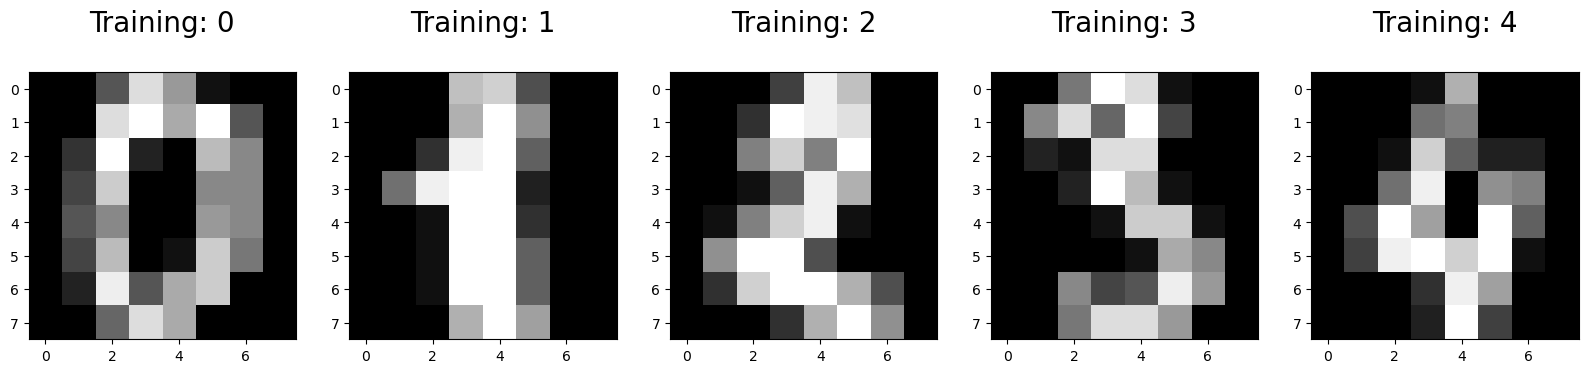

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate (zip(digits.data[0:5], digits.target[0:5])):

  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data, digits.target, test_size=0.23 ,random_state=2)

In [7]:
print(x_train.shape)

(1383, 64)


In [8]:
print(y_train.shape)

(1383,)


In [12]:
print(x_test.shape)

(414, 64)


In [13]:
print(y_test.shape)

(414,)


In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


C:\Users\nahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
print(lr.predict(x_test[0].reshape(1,-1)))

[4]


In [18]:
lr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [19]:
predictions = lr.predict(x_test)

In [20]:
score = lr.score(x_test, y_test)
print(score)

0.9516908212560387


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [22]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


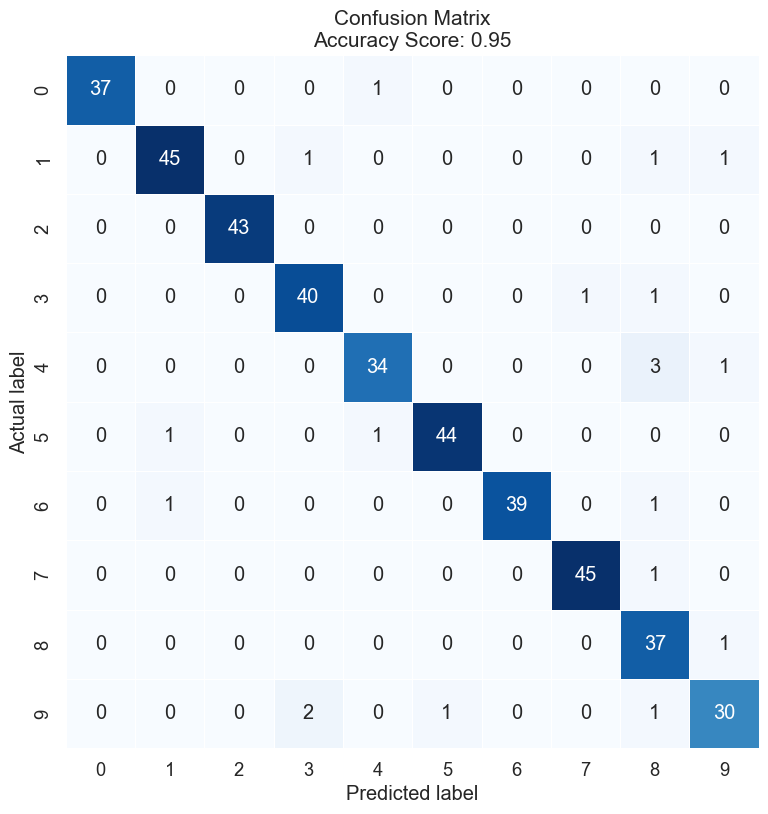

In [29]:
# Set up the plot
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.2)  # Adjust the font size

# Create a heatmap with annotations
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues', cbar=False)

# Set labels and title
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix\nAccuracy Score: {score:.2f}', size=15)

plt.show()

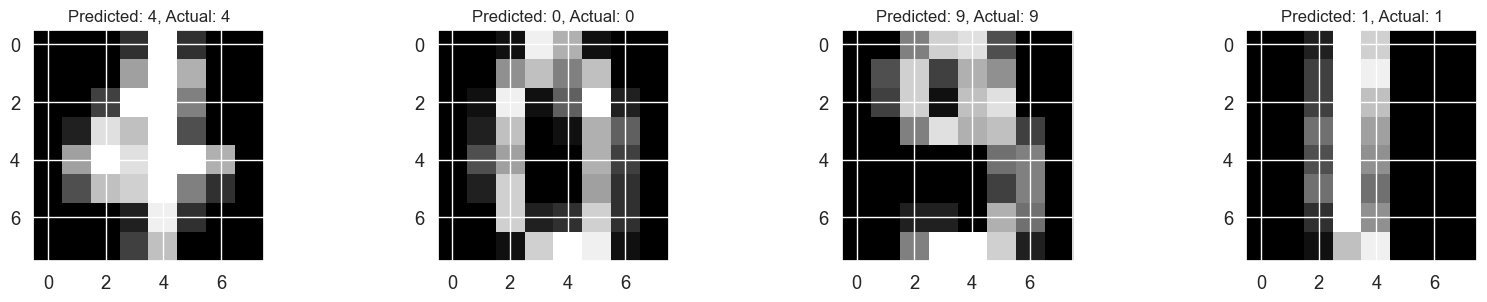

In [31]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
classifiedIndex = []

# Assuming 'predictions' is a variable containing your model predictions
# and 'y_test' is the actual labels
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1

# Plot the first 4 misclassified instances
plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(classifiedIndex[:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap=plt.cm.gray)  # Assuming X_test is your test set
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=12)

plt.show()
